In [8]:
# pip install yahoo_fin
# pip install pycoingecko
# pip install yfinance
# pip install yfinance plotly
# pip install mplfinance 

### Import Library

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

### Load dataset

In [10]:
import yfinance as yf
from datetime import datetime

ticker = 'GC=F'

end_date = datetime.today().strftime('%Y-%m-%d')

# Get the latest data for gold futures
gold_data = yf.download(ticker, start='2004-01-01', end=end_date)

goldDF = pd.DataFrame(gold_data).reset_index()
goldDF

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-05,415.700012,422.500000,422.500000,424.399994,424.399994,20
1,2004-01-06,424.399994,424.299988,424.299988,422.799988,422.799988,20
2,2004-01-07,423.000000,423.000000,423.000000,421.899994,421.899994,20
3,2004-01-08,421.899994,422.000000,422.000000,424.000000,424.000000,20
4,2004-01-09,424.000000,423.899994,423.899994,426.399994,426.399994,20
...,...,...,...,...,...,...,...
5021,2023-12-27,2067.300049,2081.899902,2064.800049,2081.899902,2081.899902,586
5022,2023-12-28,2081.600098,2087.300049,2066.500000,2073.899902,2073.899902,338
5023,2023-12-29,2068.000000,2068.899902,2062.100098,2062.399902,2062.399902,47
5024,2024-01-02,2063.500000,2073.699951,2057.100098,2064.399902,2064.399902,61


In [11]:
goldDF.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [12]:
goldDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5026 entries, 0 to 5025
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5026 non-null   datetime64[ns]
 1   Open       5026 non-null   float64       
 2   High       5026 non-null   float64       
 3   Low        5026 non-null   float64       
 4   Close      5026 non-null   float64       
 5   Adj Close  5026 non-null   float64       
 6   Volume     5026 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 275.0 KB


### Data Cleaning

In [14]:
# Checking for missing values

missing_values = goldDF.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [15]:
# Handling missing values (if have)
goldDF = goldDF.dropna()

### Exploratory Data Analysis (EDA)

In [16]:
# Summary statistics

summary_stats = goldDF.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                                 Date         Open         High          Low  \
count                           5026  5026.000000  5026.000000  5026.000000   
mean   2014-01-05 20:14:48.181456384  1240.650756  1246.903104  1234.019101   
min              2004-01-05 00:00:00   375.799988   375.799988   375.799988   
25%              2009-01-08 06:00:00   920.750015   926.225006   914.199982   
50%              2014-01-06 12:00:00  1269.250000  1274.000000  1264.049988   
75%              2019-01-07 18:00:00  1622.975006  1636.674957  1613.325012   
max              2024-01-03 00:00:00  2081.600098  2130.199951  2066.500000   
std                              NaN   453.362711   455.805561   450.831989   

             Close    Adj Close         Volume  
count  5026.000000  5026.000000    5026.000000  
mean   1240.519976  1240.519976    4812.559690  
min     374.799988   374.799988       0.000000  
25%     921.674988   921.674988      30.250000  
50%    1269.500000  12

In [17]:
mean_difference = (goldDF['Adj Close'] - goldDF['Close']).mean()
std_difference = (goldDF['Adj Close'] - goldDF['Close']).std()

print(f"Mean Difference: {mean_difference:.2f} USD")
print(f"Standard Deviation of Difference: {std_difference:.2f} USD")

Mean Difference: 0.00 USD
Standard Deviation of Difference: 0.00 USD


In [18]:
maen100Days = goldDF['Close'].rolling(100).mean()
maen200Days = goldDF['Close'].rolling(200).mean()
maen300Days = goldDF['Close'].rolling(300).mean()

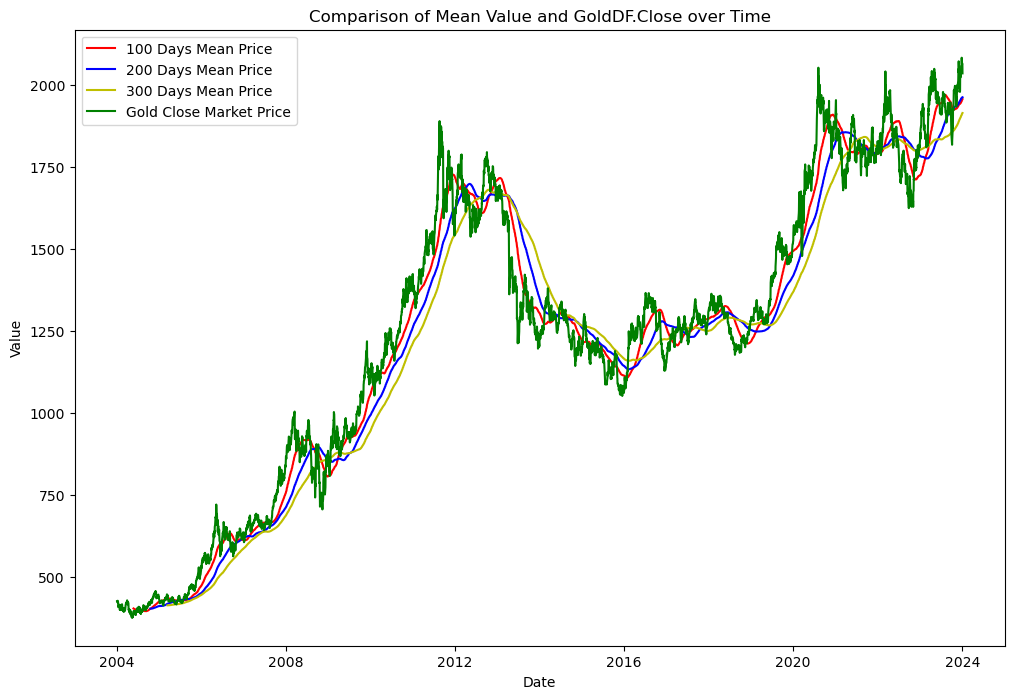

In [19]:
plt.figure(figsize=(12, 8))

# Plot the mean value
plt.plot(goldDF['Date'], maen100Days, 'r', label='100 Days Mean Price')
plt.plot(goldDF['Date'], maen200Days, 'b', label='200 Days Mean Price')
plt.plot(goldDF['Date'], maen300Days, 'y', label='300 Days Mean Price')

# Plot the 'Close' values
plt.plot(goldDF['Date'], goldDF['Close'], 'g', label='Gold Close Market Price')

# Customize the plot
plt.title('Comparison of Mean Value and GoldDF.Close over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

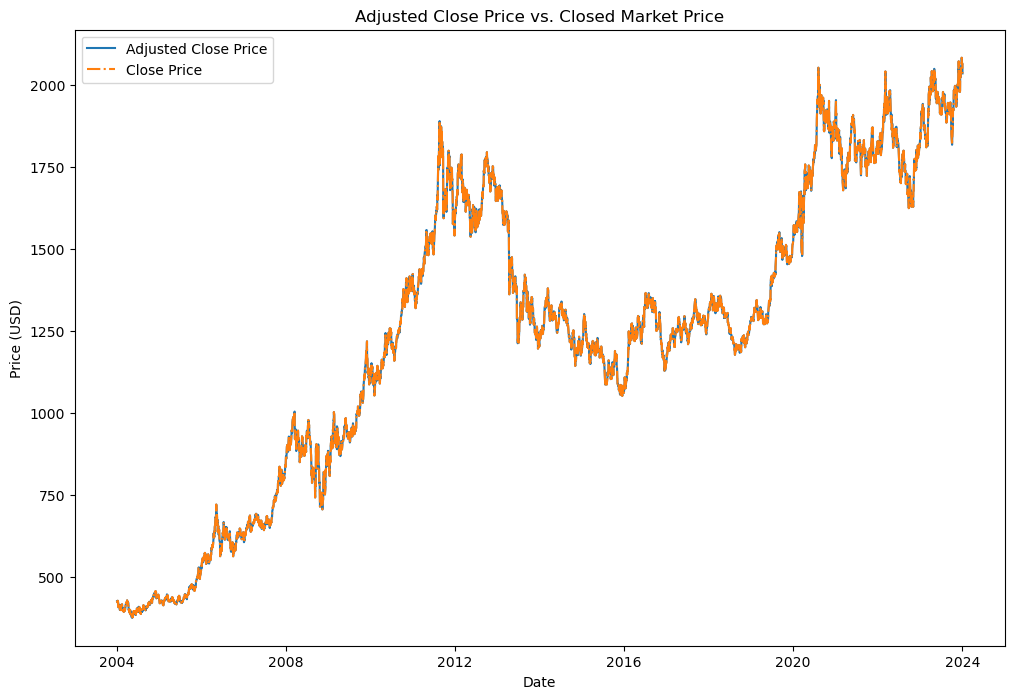

In [20]:
plt.figure(figsize=(12, 8))

plt.plot(goldDF['Date'], goldDF['Adj Close'], label='Adjusted Close Price', linestyle='-')
plt.plot(goldDF['Date'], goldDF['Close'], label='Close Price', linestyle='-.')

plt.legend()
plt.title('Adjusted Close Price vs. Closed Market Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.show()

In [21]:
goldDF.std()

Date         2107 days 22:32:59.861284992
Open                           453.362711
High                           455.805561
Low                            450.831989
Close                          453.334194
Adj Close                      453.334194
Volume                       26160.562539
dtype: object

In [22]:
goldDF_corr = goldDF.corr()
goldDF_corr

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.854201,0.853240,0.855854,0.854419,0.854419,0.022421
Open,0.854201,1.000000,0.999831,0.999763,0.999648,0.999648,0.024494
High,0.853240,0.999831,1.000000,0.999677,0.999800,0.999800,0.023205
Low,0.855854,0.999763,0.999677,1.000000,0.999845,0.999845,0.025450
Close,0.854419,0.999648,0.999800,0.999845,1.000000,1.000000,0.024137
Adj Close,0.854419,0.999648,0.999800,0.999845,1.000000,1.000000,0.024137
Volume,0.022421,0.024494,0.023205,0.025450,0.024137,0.024137,1.000000


### Feature selection

In [23]:
X = goldDF.drop(['Date', 'Adj Close'], axis=1)
y = goldDF.Date

In [24]:
X.head()

,Open,High,Low,Close,Volume
0,415.700012,422.500000,422.500000,424.399994,20
1,424.399994,424.299988,424.299988,422.799988,20
2,423.000000,423.000000,423.000000,421.899994,20
3,421.899994,422.000000,422.000000,424.000000,20
4,424.000000,423.899994,423.899994,426.399994,20


In [25]:
y.head()

0   2004-01-05
1   2004-01-06
2   2004-01-07
3   2004-01-08
4   2004-01-09
Name: Date, dtype: datetime64[ns]

In [26]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X_scaler.std()

1.0

---

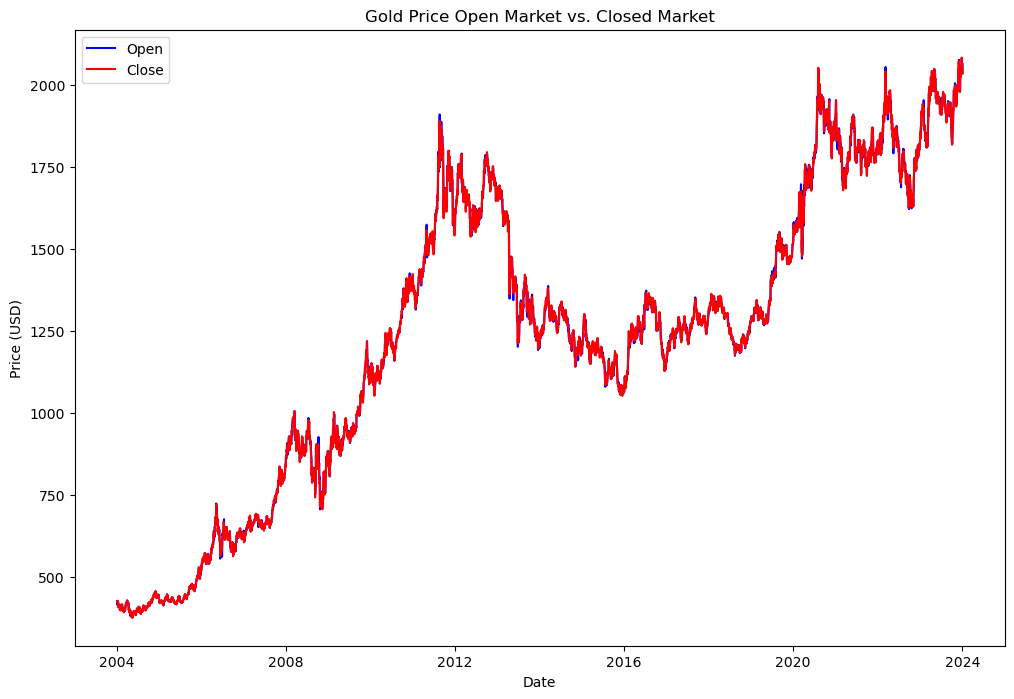

In [27]:
plt.figure(figsize=(12, 8))

plt.plot(goldDF['Date'], goldDF['Open'], label='Open', linestyle='-', color='blue')
plt.plot(goldDF['Date'], goldDF['Close'], label='Close', linestyle='-', color='red')

plt.legend()
plt.title('Gold Price Open Market vs. Closed Market')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.show()

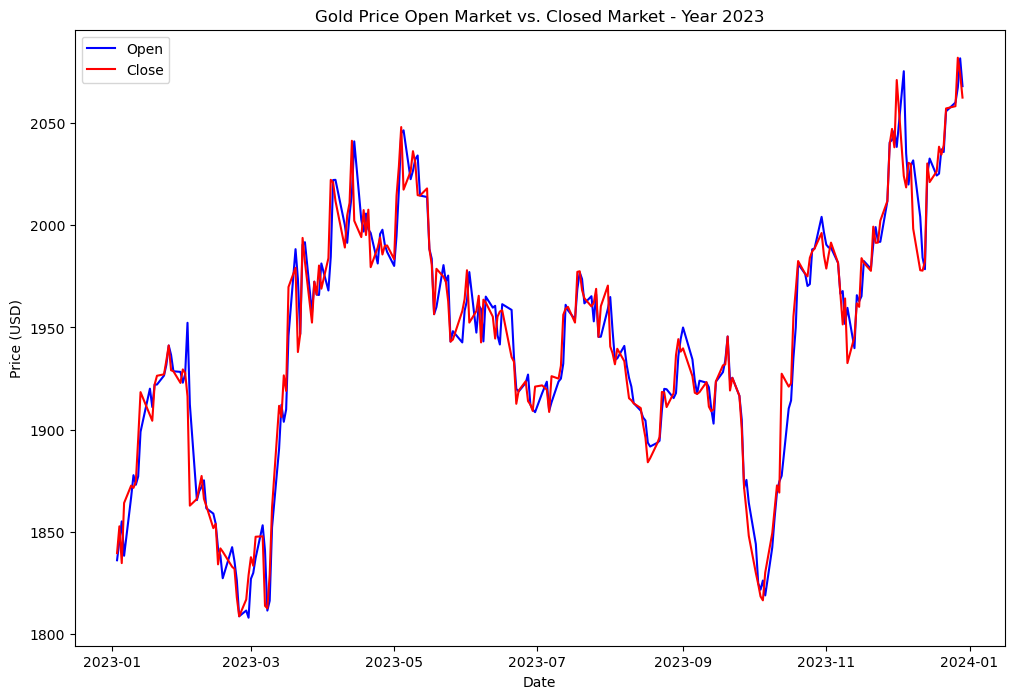

In [28]:
year2023 = goldDF[goldDF['Date'].dt.year == 2023]

plt.figure(figsize=(12, 8))

plt.plot(year2023['Date'], year2023['Open'], label='Open', linestyle='-', color='blue')
plt.plot(year2023['Date'], year2023['Close'], label='Close', linestyle='-', color='red')

plt.legend()
plt.title('Gold Price Open Market vs. Closed Market - Year 2023')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.show()


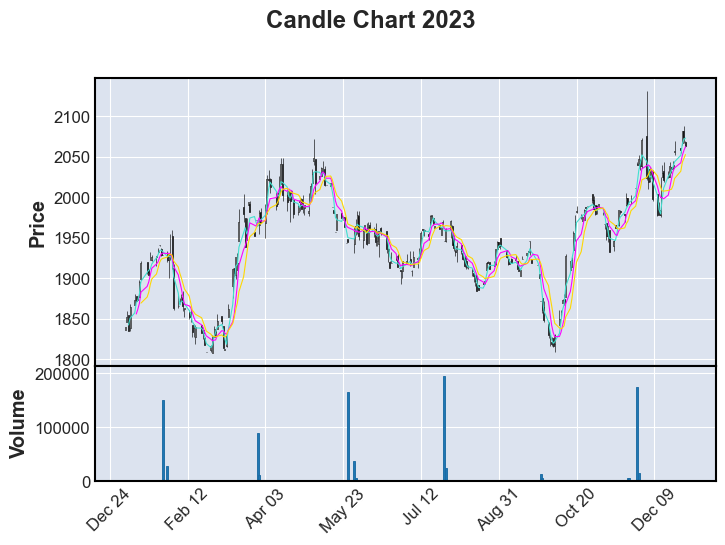

In [29]:
import mplfinance as mpf

Fdf = goldDF.copy()
Fdf.set_index('Date', inplace=True)

dec_2023 = Fdf.loc['2023-01-01':'2023-12-31']

mpf.plot(dec_2023, type='candle', mav=(3, 6, 9), figratio=(12, 8), volume=True,
         title='Candle Chart 2023', show_nontrading=True)

mpf.show()


In [30]:
goldDF_2023 = goldDF[goldDF['Date'].dt.year == 2023]

top_volume_per_month_2023 = goldDF_2023.groupby(goldDF_2023['Date'].dt.month)['Volume'].idxmax()

top_volume_data_2023 = goldDF_2023.loc[top_volume_per_month_2023]

print(top_volume_data_2023)

           Date         Open         High          Low        Close  \
4790 2023-01-27  1928.599976  1928.599976  1928.599976  1928.599976   
4793 2023-02-01  1927.199951  1955.000000  1922.000000  1927.800049   
4832 2023-03-29  1966.099976  1966.099976  1966.099976  1966.099976   
4842 2023-04-13  2015.599976  2048.600098  2015.599976  2041.300049   
4873 2023-05-26  1948.199951  1948.400024  1944.099976  1944.099976   
4876 2023-06-01  1963.199951  1983.000000  1954.300049  1978.000000   
4914 2023-07-27  1945.400024  1945.400024  1945.400024  1945.400024   
4937 2023-08-29  1917.900024  1936.500000  1916.900024  1936.500000   
4957 2023-09-27  1871.599976  1871.599976  1871.599976  1871.599976   
4960 2023-10-02  1844.099976  1845.900024  1826.699951  1830.000000   
5001 2023-11-28  2040.599976  2042.699951  2039.699951  2039.699951   
5012 2023-12-13  1978.500000  2024.800049  1975.000000  1982.300049   

        Adj Close  Volume  
4790  1928.599976  150902  
4793  1927.800049   

In [35]:
goldDF['Date'] = pd.to_datetime(goldDF['Date'])

dec_2023_data = goldDF[(goldDF['Date'].dt.year == 2023) & (goldDF['Date'].dt.month == 12)]

top_5_volume_dec_2023 = dec_2023_data.sort_values(by='Volume', ascending=False).head(10)

print(top_5_volume_dec_2023)

           Date         Open         High          Low        Close  \
5012 2023-12-13  1978.500000  2024.800049  1975.000000  1982.300049   
5005 2023-12-04  2075.300049  2130.199951  2021.000000  2024.099976   
5010 2023-12-11  2004.099976  2004.199951  1977.199951  1978.000000   
5004 2023-12-01  2038.300049  2073.199951  2036.000000  2071.000000   
5021 2023-12-27  2067.300049  2081.899902  2064.800049  2081.899902   
5016 2023-12-19  2025.199951  2042.699951  2025.199951  2038.400024   
5009 2023-12-08  2031.699951  2033.099976  1995.000000  1998.300049   
5007 2023-12-06  2019.900024  2035.800049  2019.000000  2030.500000   
5022 2023-12-28  2081.600098  2087.300049  2066.500000  2073.899902   
5006 2023-12-05  2035.099976  2037.000000  2010.199951  2018.500000   

        Adj Close  Volume  
5012  1982.300049    2252  
5005  2024.099976    1071  
5010  1978.000000     651  
5004  2071.000000     614  
5021  2081.899902     586  
5016  2038.400024     498  
5009  1998.300049     

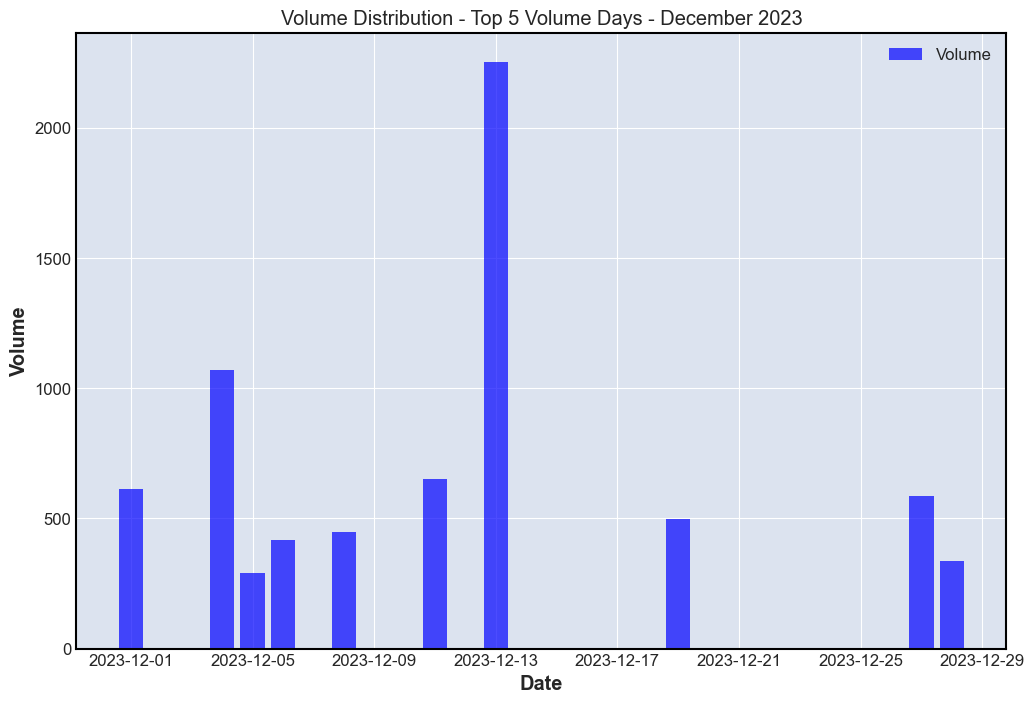

In [36]:
plt.figure(figsize=(12, 8))
plt.bar(top_5_volume_dec_2023['Date'], top_5_volume_dec_2023['Volume'], color='blue', alpha=0.7)

plt.legend(['Volume'])
plt.title('Volume Distribution - Top 5 Volume Days - December 2023')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.show()


2023-12-04 -

2023-12-13 - CPI報告  美国CPI在11月增长了3.1%，市场预计美联储将在周三继续推高利率。這個報告是利多黃金所以交易者都會選擇在這個時間入場


2023-12-22 - GDP報告 年化增长率为4.9%,低于之前的5.2，這個報告是利多黃金所以交易者都會選擇在這個時間入場

黃金升 美金跌 主要的原因
经济不确定性 Economic Uncertainty
通胀对冲 Inflation Hedge
货币贬值 Currency Depreciation

---

------